In [ ]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
# !mkdir /home/aistudio/external-libraries
# !pip install beautifulsoup4 -t /home/aistudio/external-libraries

In [ ]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

In [ ]:
# !mv data/data76987/data_format2.zip .

In [ ]:
# !unzip data_format1.zip

In [ ]:
# !unzip data_format2.zip

In [ ]:
!pip install --upgrade numpy

Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 15.3MB 8.9MB/s eta 0:00:011
ERROR: blackhole 0.3.2 has requirement xgboost==1.1.0, but you'll have xgboost 1.3.3 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


# 数据探索

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

In [ ]:
np.__version__ # 需要大于 1.17

'1.20.2'

In [ ]:
# reduce memory
def reduce_mem_usage(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
                    
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
"""
读取数据集
"""
test_data = pd.read_csv('./data_format1/test_format1.csv')
train_data = pd.read_csv('./data_format1/train_format1.csv')
train_data2 = pd.read_csv('./data_format2/train_format2.csv')

user_info = pd.read_csv('./data_format1/user_info_format1.csv')
user_log = pd.read_csv('./data_format1/user_log_format1.csv')

'\n读取数据集\n'

In [ ]:
train_data = reduce_mem_usage(train_data)
test_data = reduce_mem_usage(test_data)
train_data2 = reduce_mem_usage(train_data2)

user_info = reduce_mem_usage(user_info)
user_log = reduce_mem_usage(user_log)

In [ ]:
# train_data2.label.unique()
train_data2.head(5)

,user_id,age_range,gender,merchant_id,label,activity_log
0,34176,6.0,0.0,944,-1,408895:1505:7370:1107:0
1,34176,6.0,0.0,412,-1,17235:1604:4396:0818:0#954723:1604:4396:0818:0...
2,34176,6.0,0.0,1945,-1,231901:662:2758:0818:0#231901:662:2758:0818:0#...
3,34176,6.0,0.0,4752,-1,174142:821:6938:1027:0
4,34176,6.0,0.0,643,-1,716371:1505:968:1024:3


In [ ]:
train_data.head(5)

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [ ]:
test_data.head(5)

,user_id,merchant_id,prob
0,163968,4605,NaN
1,360576,1581,NaN
2,98688,1964,NaN
3,98688,3645,NaN
4,295296,3361,NaN


In [ ]:
user_info.head(5)

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [ ]:
user_log.head(5)

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2660.0,829,0
1,328862,844400,1271,2882,2660.0,829,0
2,328862,575153,1271,2882,2660.0,829,0
3,328862,996875,1271,2882,2660.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


### 单变量数据分析

In [ ]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int32  
 1   age_range  421953 non-null  float16
 2   gender     417734 non-null  float16
dtypes: float16(2), int32(1)
memory usage: 3.2 MB


In [ ]:
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int32  
 1   item_id      int32  
 2   cat_id       int16  
 3   seller_id    int16  
 4   brand_id     float16
 5   time_stamp   int16  
 6   action_type  int8   
dtypes: float16(1), int16(3), int32(2), int8(1)
memory usage: 890.5 MB


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      260864 non-null  int32
 1   merchant_id  260864 non-null  int16
 2   label        260864 non-null  int8 
dtypes: int16(1), int32(1), int8(1)
memory usage: 1.7 MB


### 缺失值

In [ ]:
(user_info.shape[0]-user_info['age_range'].count())/user_info.shape[0] # 0.5% 缺失

0.005226677982884221

In [ ]:
user_info[user_info['age_range'].isna() | (user_info['age_range'] == 0)].count()

user_id      95131
age_range    92914
gender       90664
dtype: int64

In [ ]:
user_info.groupby(['age_range'])[['user_id']].count()

,user_id
age_range,
0.0,92914
1.0,24
2.0,52871
3.0,111654
4.0,79991
5.0,40777
6.0,35464
7.0,6992
8.0,1266


In [ ]:
(user_info.shape[0]-user_info['gender'].count())/user_info.shape[0]

0.01517316170403376

In [ ]:
user_info[user_info['gender'].isna() | (user_info['gender'] == 2)].count()

user_id      16862
age_range    14664
gender       10426
dtype: int64

In [ ]:
user_info.groupby(['gender'])[['user_id']].count()

,user_id
gender,
0.0,285638
1.0,121670
2.0,10426


In [ ]:
user_info[user_info['age_range'].isna() | (user_info['age_range'] == 0) | user_info['gender'].isna() | (user_info['gender'] == 2)].count()

user_id      106330
age_range    104113
gender        99894
dtype: int64

### 用户行为日志信息

In [ ]:
user_log.isna().sum()


user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

### 观察数据分布

In [ ]:
user_info.describe()


,user_id,age_range,gender
count,424170.000000,421953.0,417734.0
mean,212085.500000,NaN,NaN
std,122447.476179,0.0,0.0
min,1.000000,0.0,0.0
25%,106043.250000,2.0,0.0
50%,212085.500000,3.0,0.0
75%,318127.750000,4.0,1.0
max,424170.000000,8.0,2.0


In [ ]:
user_log.describe()


,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
count,5.492533e+07,5.492533e+07,5.492533e+07,5.492533e+07,54834315.0,5.492533e+07,5.492533e+07
mean,2.121568e+05,5.538613e+05,8.770308e+02,2.470941e+03,NaN,9.230953e+02,2.854458e-01
std,1.222872e+05,3.221459e+05,4.486269e+02,1.473310e+03,NaN,1.954305e+02,8.075806e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,5.110000e+02,0.000000e+00
25%,1.063360e+05,2.731680e+05,5.550000e+02,1.151000e+03,2027.0,7.300000e+02,0.000000e+00
50%,2.126540e+05,5.555290e+05,8.210000e+02,2.459000e+03,4064.0,1.010000e+03,0.000000e+00
75%,3.177500e+05,8.306890e+05,1.252000e+03,3.760000e+03,6196.0,1.109000e+03,0.000000e+00
max,4.241700e+05,1.113166e+06,1.671000e+03,4.995000e+03,8480.0,1.112000e+03,3.000000e+00


### 查看正负样本的分布

正负样本的数量：
 label
0    244912
1     15952
Name: user_id, dtype: int64


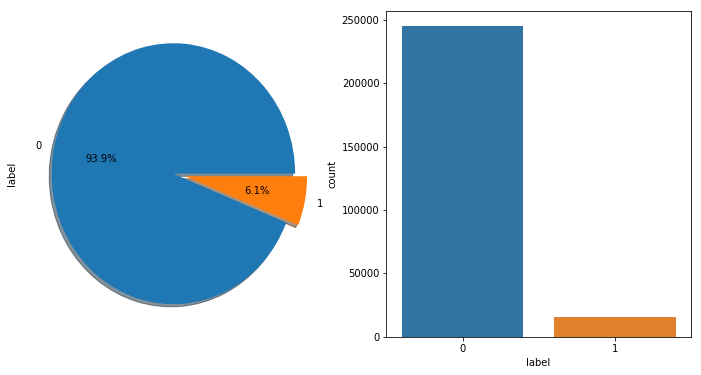

In [ ]:
label_gp = train_data.groupby('label')['user_id'].count()
print('正负样本的数量：\n',label_gp)
_,axe = plt.subplots(1,2,figsize=(12,6))
train_data.label.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0,0.1],ax=axe[0])
sns.countplot('label',data=train_data,ax=axe[1],)

样本的分布不均衡，需要采取一定的措施处理样本不均衡的问题：

- 类似欠采样,将一份正样本和多分负样本组合成多份训练集,训练多个模型后求平均
- 调整模型的权重

## 探查店铺、用户、性别以及年龄对复购的影响

选取店铺
店铺	购买次数
4044    3379
3828    3254
4173    2542
1102    2483
4976    1925
Name: merchant_id, dtype: int64


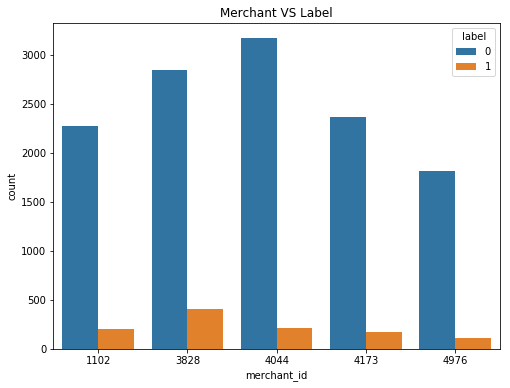

In [ ]:
print('选取店铺\n店铺\t购买次数')
print(train_data.merchant_id.value_counts().head(5))
train_data_merchant = train_data.copy()
train_data_merchant['TOP5'] = train_data_merchant['merchant_id'].map(lambda x: 1 if x in [4044,3828,4173,1102,4976] else 0)
train_data_merchant = train_data_merchant[train_data_merchant['TOP5']==1]

plt.figure(figsize=(8,6))
plt.title('Merchant VS Label')
ax = sns.countplot('merchant_id',hue='label',data=train_data_merchant)
for p in ax.patches:
    height = p.get_height()

### 查看店铺复购概率分布

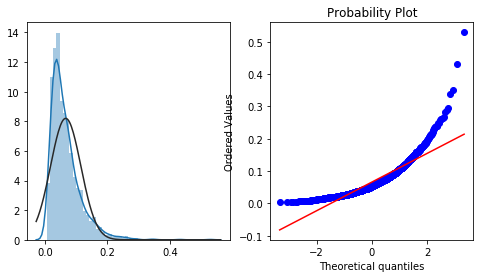

In [ ]:
merchant_repeat_buy = [ rate for rate in train_data.groupby(['merchant_id'])['label'].mean() if rate <= 1 and rate > 0] 
plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.distplot(merchant_repeat_buy, fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(merchant_repeat_buy, plot=plt)

### 查看用户大于一次复购概率分布

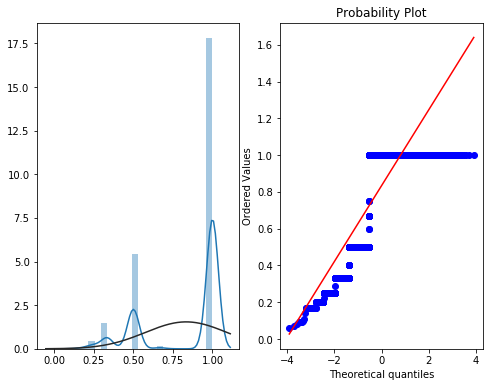

In [ ]:
user_repeat_buy = [rate for rate in train_data.groupby(['user_id'])['label'].mean() if rate <= 1 and rate > 0] 

plt.figure(figsize=(8,6))

ax=plt.subplot(1,2,1)
sns.distplot(user_repeat_buy, fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(user_repeat_buy, plot=plt)

可以看出，用户复购率很小，基本买一次为主

### 查看用户性别与复购的关系

In [ ]:
train_data_user_info = train_data.merge(user_info,on=['user_id'],how='left')

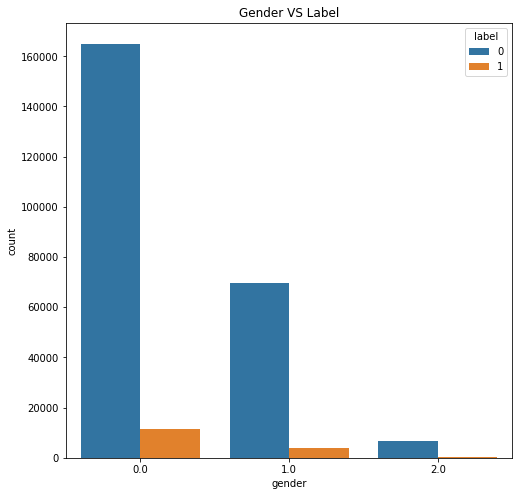

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Gender VS Label')
ax = sns.countplot('gender',hue='label',data=train_data_user_info)
for p in ax.patches:
    height = p.get_height()

### 查看用户性别复购的分布

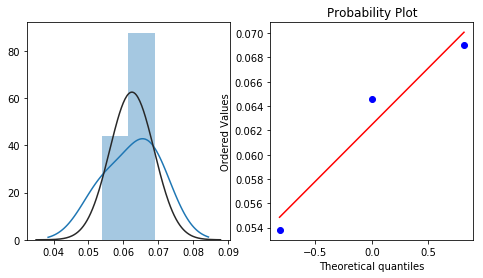

In [ ]:
repeat_buy = [rate for rate in train_data_user_info.groupby(['gender'])['label'].mean()] 

plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.distplot(repeat_buy, fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(repeat_buy, plot=plt)

男女的复购率不一样

### 查看用户年龄与复购的关系

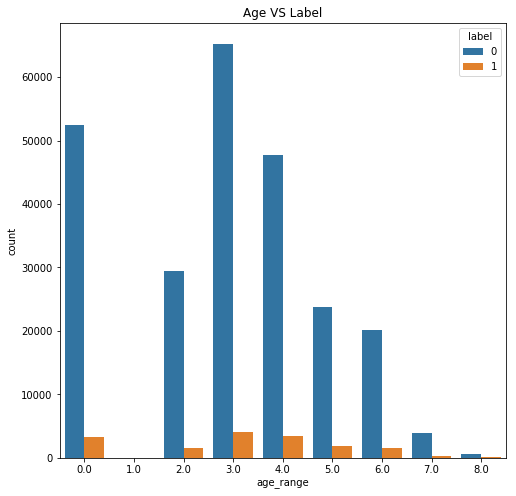

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Age VS Label')
ax = sns.countplot('age_range',hue='label',data=train_data_user_info)

### 查看用户年龄复购的分布

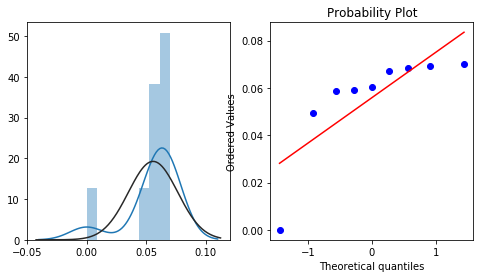

In [ ]:
repeat_buy = [rate for rate in train_data_user_info.groupby(['age_range'])['label'].mean()] 

plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.distplot(repeat_buy, fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(repeat_buy, plot=plt)

不同年龄段，复购概率不同

# 特征工程（实际）

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import gc
from collections import Counter
import copy

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

## 数据处理

In [ ]:
train_data['origin'] = 'train'
test_data['origin'] = 'test'
all_data = pd.concat([train_data, test_data], ignore_index=True, sort=False)
all_data.drop(['prob'], axis=1, inplace=True)
all_data = all_data.merge(user_info, on='user_id', how='left')


user_log.rename(columns={'seller_id':'merchant_id'}, inplace=True)
user_log['time_stamp'] = pd.to_datetime(user_log['time_stamp'], format='%H%M')


del user_info, train_data
gc.collect()

24

In [ ]:
#特征处理
groups = user_log.groupby(['user_id'])
temp = groups.size().reset_index().rename(columns={0:'u1'})
all_data = all_data.merge(temp, on='user_id', how='left')

temp = groups['item_id'].agg([('u2', 'nunique')]).reset_index()
all_data = all_data.merge(temp, on='user_id', how='left')

temp = groups['cat_id'].agg([('u3', 'nunique')]).reset_index()
all_data = all_data.merge(temp, on='user_id', how='left')

temp = groups['merchant_id'].agg([('u4', 'nunique')]).reset_index()
all_data = all_data.merge(temp, on='user_id', how='left')

temp = groups['brand_id'].agg([('u5', 'nunique')]).reset_index()
all_data = all_data.merge(temp, on='user_id', how='left')

temp = groups['time_stamp'].agg([('F_time', 'min'), ('L_time', 'max')]).reset_index()
temp['u6'] = (temp['L_time'] - temp['F_time']).dt.seconds/3600
all_data = all_data.merge(temp[['user_id', 'u6']], on='user_id', how='left')

temp = groups['action_type'].value_counts().unstack().reset_index().rename(columns={0:'u7', 1:'u8', 2:'u9', 3:'u10'})
all_data = all_data.merge(temp, on='user_id', how='left')

temp = groups['time_stamp'].agg([('u11', 'nunique')]).reset_index()
all_data = all_data.merge(temp, on='user_id', how='left')

In [ ]:
# 统计数据中最多的数据
def most_n(x, n):
    try:
        return Counter(x.split(' ')).most_common(n)[n-1][0]
    except:
        return -1

# 统计数据中最多数据的总数
def most_n_cnt(x, n):
    try:
        return Counter(x.split(' ')).most_common(n)[n-1][1]
    except:
        return -1

In [ ]:
list_join_func = lambda x: " ".join([str(i) for i in x])

temp = groups['merchant_id'].agg([('p', list_join_func)]).reset_index()
all_data = all_data.merge(temp, on='user_id', how='left')

func = lambda x: most_n(x, 1)
all_data['u13'] = all_data['p'].apply(func)

func = lambda x: most_n_cnt(x, 1)
all_data['u14'] = all_data['p'].apply(func)

all_data.drop(['p'], axis=1, inplace=True)



temp = groups['cat_id'].agg([('p', list_join_func)]).reset_index()
all_data = all_data.merge(temp, on='user_id', how='left')

func = lambda x: most_n(x, 1)
all_data['u15'] = all_data['p'].apply(func)

func = lambda x: most_n_cnt(x, 1)
all_data['u16'] = all_data['p'].apply(func)

all_data.drop(['p'], axis=1, inplace=True)



temp = groups['brand_id'].agg([('p', list_join_func)]).reset_index()
all_data = all_data.merge(temp, on='user_id', how='left')

func = lambda x: most_n(x, 1)
all_data['u17'] = all_data['p'].apply(func)

func = lambda x: most_n_cnt(x, 1)
all_data['u18'] = all_data['p'].apply(func)

all_data.drop(['p'], axis=1, inplace=True)



temp = groups['action_type'].agg([('p', list_join_func)]).reset_index()
all_data = all_data.merge(temp, on='user_id', how='left')

func = lambda x: most_n(x, 1)
all_data['u19'] = all_data['p'].apply(func)

func = lambda x: most_n_cnt(x, 1)
all_data['u20'] = all_data['p'].apply(func)

all_data.drop(['p'], axis=1, inplace=True)

In [ ]:
all_data.columns

Index(['user_id', 'merchant_id', 'label', 'origin', 'age_range', 'gender',
       'u1', 'u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'u8', 'u9', 'u10', 'u11',
       'u13', 'u14', 'u15', 'u16', 'u17', 'u18', 'u19', 'u20'],
      dtype='object')

In [ ]:
groups = user_log.groupby(['merchant_id'])
temp = groups.size().reset_index().rename(columns={0:'m1'})
all_data = all_data.merge(temp, on='merchant_id', how='left')

temp = groups['user_id', 'item_id', 'cat_id', 'brand_id'].nunique().reset_index().rename(columns={'user_id':'m2','item_id':'m3', 'cat_id':'m4', 'brand_id':'m5'})
all_data = all_data.merge(temp, on='merchant_id', how='left')

temp = groups['action_type'].value_counts().unstack().reset_index().rename(columns={0:'m6', 1:'m7', 2:'m8', 3:'m9'})
all_data = all_data.merge(temp, on='merchant_id', how='left')

temp = train_data2[train_data2['label']==1].groupby(['merchant_id']).size().reset_index().rename(columns={0:'m10'})
all_data = all_data.merge(temp, on='merchant_id', how='left')

temp = train_data2[train_data2['label']==-1].groupby(['merchant_id']).size().reset_index().rename(columns={0:'m11'})
all_data = all_data.merge(temp, on='merchant_id', how='left')

In [ ]:
all_data.columns

Index(['user_id', 'merchant_id', 'label', 'origin', 'age_range', 'gender',
       'u1', 'u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'u8', 'u9', 'u10', 'u11',
       'u13', 'u14', 'u15', 'u16', 'u17', 'u18', 'u19', 'u20', 'm1', 'm2',
       'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11'],
      dtype='object')

In [ ]:
groups = user_log.groupby(['user_id', 'merchant_id'])

temp = groups.size().reset_index().rename(columns={0:'um1'})
all_data = all_data.merge(temp, on=['user_id', 'merchant_id'], how='left')

temp = groups['item_id', 'cat_id', 'brand_id'].nunique().reset_index().rename(columns={ 'item_id':'um2', 'cat_id':'um3', 'brand_id':'um4'})
all_data = all_data.merge(temp, on=['user_id', 'merchant_id'], how='left')

temp = groups['action_type'].value_counts().unstack().reset_index().rename(columns={0:'um5',1:'um6',2:'um7',3:'um8'})
all_data = all_data.merge(temp, on=['user_id', 'merchant_id'], how='left')

temp = groups['time_stamp'].agg([('frist', 'min'), ('last', 'max')]).reset_index()
temp['um9'] = (temp['last'] - temp['frist']).dt.seconds/3600
temp.drop(['frist', 'last'], axis=1, inplace=True)
all_data = all_data.merge(temp, on=['user_id', 'merchant_id'], how='left')


all_data['r1'] = all_data['u9']/all_data['u7'] # 用户购买点击比
all_data['r2'] = all_data['m8']/all_data['m6'] # 商家购买点击比
all_data['r3'] = all_data['um7']/all_data['um5'] # 不同用户不同商家购买点击比

In [ ]:
temp = pd.get_dummies(all_data['age_range'], prefix='age')
all_data = pd.concat([all_data, temp], axis=1)

temp = pd.get_dummies(all_data['gender'], prefix='g')
all_data = pd.concat([all_data, temp], axis=1)
all_data.drop(['age_range', 'gender'], axis=1, inplace=True)

In [ ]:
all_data.columns

Index(['user_id', 'merchant_id', 'label', 'origin', 'u1', 'u2', 'u3', 'u4',
       'u5', 'u6', 'u7', 'u8', 'u9', 'u10', 'u11', 'u13', 'u14', 'u15', 'u16',
       'u17', 'u18', 'u19', 'u20', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7',
       'm8', 'm9', 'm10', 'm11', 'um1', 'um2', 'um3', 'um4', 'um5', 'um6',
       'um7', 'um8', 'um9', 'r1', 'r2', 'r3', 'age_0.0', 'age_1.0', 'age_2.0',
       'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'age_7.0', 'age_8.0',
       'g_0.0', 'g_1.0', 'g_2.0'],
      dtype='object')

In [ ]:
train_data = all_data[all_data['origin'] == 'train'].drop(['origin'], axis=1)
test = all_data[all_data['origin'] == 'test'].drop(['label', 'origin'], axis=1)
train, target = train_data.drop(['label'], axis=1), train_data['label']

del temp, all_data, groups
gc.collect()

135

In [ ]:
train_data.to_csv('train1.csv',header=True,index=False)
test.to_csv('test1.csv',header=True,index=False)

# 特征工程（演示）

## 数据处理

In [ ]:
all_data = train_data.append(test_data)
all_data = all_data.merge(user_info,on=['user_id'],how='left')
del train_data, test_data, user_info
gc.collect()

43

In [ ]:
"""
按时间排序
"""
user_log = user_log.sort_values(['user_id','time_stamp'])

In [ ]:
"""
每个用户的逐个合并所有的item_id, cat_id,seller_id,brand_id,time_stamp, action_type字段
"""

list_join_func = lambda x: " ".join([str(i) for i in x])


agg_dict = {
            'item_id' : list_join_func,	
            'cat_id' : list_join_func,
            'seller_id' : list_join_func,
            'brand_id' : list_join_func,
            'time_stamp' : list_join_func,
            'action_type' : list_join_func
        }

rename_dict = {
            'item_id' : 'item_path',
            'cat_id' : 'cat_path',
            'seller_id' : 'seller_path',
            'brand_id' : 'brand_path',
            'time_stamp' : 'time_stamp_path',
            'action_type' : 'action_type_path'
        }

def merge_list(df_ID, join_columns, df_data, agg_dict, rename_dict):
    df_data = df_data.\
            groupby(join_columns).\
            agg(agg_dict).\
            reset_index().\
            rename(columns=rename_dict)

    df_ID = df_ID.merge(df_data, on=join_columns, how="left")
    return df_ID

all_data = merge_list(all_data, 'user_id', user_log, agg_dict, rename_dict)

In [ ]:
"""
删除不需要的数据
"""
del user_log
gc.collect()

20

In [ ]:
num_rows = None
# num_rows = 2000  # 2000条测试代码使用
if num_rows:
    all_data_test = all_data.head(num_rows)
else:
    all_data_test = all_data

all_data_test.shape

(522341, 12)

## 数据统计

In [ ]:
# 统计数据的总数
def cnt_(x):
    try:
        return len(x.split(' '))
    except:
        return -1

# 统计唯一数据总数
def nunique_(x):
    try:
        return len(set(x.split(' ')))
    except:
        return -1

# 统计数据最大值
def max_(x):
    try:
        return np.max([int(i) for i in x.split(' ')])
    except:
        return -1

# 统计数据最小值
def min_(x):
    try:
        return np.min([int(i) for i in x.split(' ')])
    except:
        return -1  

# 统计数据的标准差
def std_(x):
    try:
        return np.std([float(i) for i in x.split(' ')])
    except:
        return -1 

# 统计数据中top N的数据
def most_n(x, n):
    try:
        return Counter(x.split(' ')).most_common(n)[n-1][0]
    except:
        return -1

# 统计数据中top N数据的总数
def most_n_cnt(x, n):
    try:
        return Counter(x.split(' ')).most_common(n)[n-1][1]
    except:
        return -1   

In [ ]:
def user_cnt(df_data, single_col, name):
    df_data[name] = df_data[single_col].apply(cnt_)
    return df_data

def user_nunique(df_data, single_col, name):
    df_data[name] = df_data[single_col].apply(nunique_)
    return df_data
    
def user_max(df_data, single_col, name):
    df_data[name] = df_data[single_col].apply(max_)
    return df_data

def user_min(df_data, single_col, name):
    df_data[name] = df_data[single_col].apply(min_)
    return df_data
    
def user_std(df_data, single_col, name):
    df_data[name] = df_data[single_col].apply(std_)
    return df_data

def user_most_n(df_data, single_col, name, n=1):
    func = lambda x: most_n(x, n)
    df_data[name] = df_data[single_col].apply(func)
    return df_data

def user_most_n_cnt(df_data, single_col, name, n=1):
    func = lambda x: most_n_cnt(x, n)
    df_data[name] = df_data[single_col].apply(func)
    return df_data


### 提取商铺的基本统计特征

In [ ]:
"""
	提取基本统计特征
"""

# 统计用户 点击、浏览、加购、购买行为
# 总次数
all_data_test = user_cnt(all_data_test,  'seller_path', 'user_cnt')
# 不同店铺个数
all_data_test = user_nunique(all_data_test,  'seller_path', 'seller_nunique')
# 不同品类个数
all_data_test = user_nunique(all_data_test,  'cat_path', 'cat_nunique')
# 不同品牌个数
all_data_test = user_nunique(all_data_test,  'brand_path', 'brand_nunique')
# 不同商品个数
all_data_test = user_nunique(all_data_test,  'item_path', 'item_nunique')
# 活跃天数
all_data_test = user_nunique(all_data_test,  'time_stamp_path', 'time_stamp_nunique')
# 不用行为种数
all_data_test = user_nunique(all_data_test,  'action_type_path', 'action_type_nunique')

In [ ]:
# 最晚时间
all_data_test = user_max(all_data_test,  'action_type_path', 'time_stamp_max')
# 最早时间
all_data_test = user_min(all_data_test,  'action_type_path', 'time_stamp_min')
# 活跃天数方差
all_data_test = user_std(all_data_test,  'action_type_path', 'time_stamp_std')
# 最早和最晚相差天数
all_data_test['time_stamp_range'] = all_data_test['time_stamp_max'] - all_data_test['time_stamp_min']

In [ ]:
# 最晚时间
all_data_test = user_max(all_data_test,  'action_type_path', 'time_stamp_max')
# 最早时间
all_data_test = user_min(all_data_test,  'action_type_path', 'time_stamp_min')
# 活跃天数方差
all_data_test = user_std(all_data_test,  'action_type_path', 'time_stamp_std')
# 最早和最晚相差天数
all_data_test['time_stamp_range'] = all_data_test['time_stamp_max'] - all_data_test['time_stamp_min']

In [ ]:
# 用户最喜欢的店铺
all_data_test = user_most_n(all_data_test, 'seller_path', 'seller_most_1', n=1)
# 最喜欢的类目
all_data_test = user_most_n(all_data_test, 'cat_path', 'cat_most_1', n=1)
# 最喜欢的品牌
all_data_test = user_most_n(all_data_test, 'brand_path', 'brand_most_1', n=1)
# 最常见的行为动作
all_data_test = user_most_n(all_data_test, 'action_type_path', 'action_type_1', n=1)
# .....

In [ ]:
# 用户最喜欢的店铺 行为次数
all_data_test = user_most_n_cnt(all_data_test, 'seller_path', 'seller_most_1_cnt', n=1)
# 最喜欢的类目 行为次数
all_data_test = user_most_n_cnt(all_data_test, 'cat_path', 'cat_most_1_cnt', n=1)
# 最喜欢的品牌 行为次数
all_data_test = user_most_n_cnt(all_data_test, 'brand_path', 'brand_most_1_cnt', n=1)
# 最常见的行为动作 行为次数
all_data_test = user_most_n_cnt(all_data_test, 'action_type_path', 'action_type_1_cnt', n=1)
# .....

In [ ]:
all_data_test.shape

(522341, 31)

### 分开统计用户的点击，加购，购买，收藏特征

In [ ]:
# 点击、加购、购买、收藏 分开统计
"""
统计基本特征函数  
-- 根据不同行为的业务函数
-- 提取不同特征
"""
def col_cnt_(df_data, columns_list, action_type):
	try:
	    data_dict = {}
	    
	    col_list = copy.deepcopy(columns_list)
	    if action_type != None:
	        col_list += ['action_type_path']

	    for col in col_list:
	        data_dict[col] = df_data[col].split(' ')

	    path_len = len(data_dict[col])
	    
	    data_out = []
	    for i_ in range(path_len):
	        data_txt = ''
	        for col_ in columns_list:
	            if data_dict['action_type_path'][i_] == action_type:
	                data_txt += '_' + data_dict[col_][i_]
	        data_out.append(data_txt)
	    
	    return len(data_out)  
	except:
		return -1

def col_nuique_(df_data, columns_list, action_type):
	try:
	    data_dict = {}
	    
	    col_list = copy.deepcopy(columns_list)
	    if action_type != None:
	        col_list += ['action_type_path']

	    for col in col_list:
	        data_dict[col] = df_data[col].split(' ')

	    path_len = len(data_dict[col])
	    
	    data_out = []
	    for i_ in range(path_len):
	        data_txt = ''
	        for col_ in columns_list:
	            if data_dict['action_type_path'][i_] == action_type:
	                data_txt += '_' + data_dict[col_][i_]
	        data_out.append(data_txt)

	    return len(set(data_out))
	except:
		return -1
    

def user_col_cnt(df_data, columns_list, action_type, name):
    df_data[name] = df_data.apply(lambda x: col_cnt_(x, columns_list, action_type), axis=1)
    return df_data

def user_col_nunique(df_data, columns_list, action_type, name):
    df_data[name] = df_data.apply(lambda x: col_nuique_(x, columns_list, action_type), axis=1)
    return df_data

In [ ]:
# 统计店铺被用户点击次数，加购次数，购买次数，收藏次数
# 点击次数
all_data_test = user_col_cnt(all_data_test,  ['seller_path'], '0', 'user_cnt_0')
# 加购次数
all_data_test = user_col_cnt(all_data_test,  ['seller_path'], '1', 'user_cnt_1')
# 购买次数
all_data_test = user_col_cnt(all_data_test,  ['seller_path'], '2', 'user_cnt_2')
# 收藏次数
all_data_test = user_col_cnt(all_data_test,  ['seller_path'], '3', 'user_cnt_3')


# 不同店铺个数
all_data_test = user_col_nunique(all_data_test,  ['seller_path'], '0', 'seller_nunique_0')
# ....

## 组合特征

In [ ]:
# 点击次数
all_data_test = user_col_cnt(all_data_test,  ['seller_path', 'item_path'], '0', 'user_cnt_0')

# 不同店铺个数
all_data_test = user_col_nunique(all_data_test,  ['seller_path', 'item_path'], '0', 'seller_nunique_0')
# ....

In [ ]:
all_data_test.columns

Index(['user_id', 'merchant_id', 'label', 'prob', 'age_range', 'gender',
       'item_path', 'cat_path', 'seller_path', 'brand_path', 'time_stamp_path',
       'action_type_path', 'user_cnt', 'seller_nunique', 'cat_nunique',
       'brand_nunique', 'item_nunique', 'time_stamp_nunique',
       'action_type_nunique', 'time_stamp_max', 'time_stamp_min',
       'time_stamp_std', 'time_stamp_range', 'seller_most_1', 'cat_most_1',
       'brand_most_1', 'action_type_1', 'seller_most_1_cnt', 'cat_most_1_cnt',
       'brand_most_1_cnt', 'action_type_1_cnt', 'user_cnt_0', 'user_cnt_1',
       'user_cnt_2', 'user_cnt_3', 'seller_nunique_0'],
      dtype='object')

## 利用countvector，tfidf提取特征

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from scipy import sparse
# cntVec = CountVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 1), max_features=100)
tfidfVec = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 1), max_features=100)


# columns_list = ['seller_path', 'cat_path', 'brand_path', 'action_type_path', 'item_path', 'time_stamp_path']
columns_list = ['seller_path']
for i, col in enumerate(columns_list):
	tfidfVec.fit(all_data_test[col])
	data_ = tfidfVec.transform(all_data_test[col])
	if i == 0:
		data_cat = data_
	else:
		data_cat = sparse.hstack((data_cat, data_))

In [ ]:
df_tfidf = pd.DataFrame(data_cat.toarray())
df_tfidf.columns = ['tfidf_' + str(i) for i in df_tfidf.columns]
all_data_test = pd.concat([all_data_test, df_tfidf],axis=1)

## embeeding特征

实际降低性能

In [ ]:
import gensim

# Train Word2Vec model

model = gensim.models.Word2Vec(all_data_test['seller_path'].apply(lambda x: x.split(' ')), vector_size=100, window=5, min_count=5, workers=4)
# model.save("product2vec.model")
# model = gensim.models.Word2Vec.load("product2vec.model")

def mean_w2v_(x, model, size=100):
    try:
        i = 0
        for word in x.split(' '):
            if word in model.wv.vocab:
                i += 1
                if i == 1:
                    vec = np.zeros(size)
                vec += model.wv[word]
        return vec / i 
    except:
        return  np.zeros(size)


def get_mean_w2v(df_data, columns, model, size):
    data_array = []
    for index, row in df_data.iterrows():
        w2v = mean_w2v_(row[columns], model, size)
        data_array.append(w2v)
    return pd.DataFrame(data_array)

df_embeeding = get_mean_w2v(all_data_test, 'seller_path', model, 100)
df_embeeding.columns = ['embeeding_' + str(i) for i in df_embeeding.columns]

In [ ]:
all_data_test = pd.concat([all_data_test, df_embeeding],axis=1)

## stacking特征

实际降低性能

就是找一个分类器，基于数据预测一个伪标签概率，当做一个新的特征

In [ ]:
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
from scipy import sparse
import xgboost
import lightgbm
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss,mean_absolute_error,mean_squared_error
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [ ]:
"""
-- 回归
-- stacking 回归特征
"""
def stacking_reg(clf,train_x,train_y,test_x,clf_name,kf,label_split=None):
    train=np.zeros((train_x.shape[0],1))
    test=np.zeros((test_x.shape[0],1))
    test_pre=np.empty((folds,test_x.shape[0],1))
    cv_scores=[]
    for i,(train_index,test_index) in enumerate(kf.split(train_x,label_split)):       
        tr_x=train_x[train_index]
        tr_y=train_y[train_index]
        te_x=train_x[test_index]
        te_y = train_y[test_index]
        if clf_name in ["rf","ada","gb","et","lr"]:
            clf.fit(tr_x,tr_y)
            pre=clf.predict(te_x).reshape(-1,1)
            train[test_index]=pre
            test_pre[i,:]=clf.predict(test_x).reshape(-1,1)
            cv_scores.append(mean_squared_error(te_y, pre))
        elif clf_name in ["xgb"]:
            train_matrix = clf.DMatrix(tr_x, label=tr_y, missing=-1)
            test_matrix = clf.DMatrix(te_x, label=te_y, missing=-1)
            z = clf.DMatrix(test_x, missing=-1)
            params = {'booster': 'gbtree',
                      'eval_metric': 'rmse',
                      'gamma': 1,
                      'min_child_weight': 1.5,
                      'max_depth': 5,
                      'lambda': 10,
                      'subsample': 0.7,
                      'colsample_bytree': 0.7,
                      'colsample_bylevel': 0.7,
                      'eta': 0.03,
                      'tree_method': 'exact',
                      'seed': 2017,
                      'nthread': 12
                      }
            num_round = 10000
            early_stopping_rounds = 100
            watchlist = [(train_matrix, 'train'),
                         (test_matrix, 'eval')
                         ]
            if test_matrix:
                model = clf.train(params, train_matrix, num_boost_round=num_round,evals=watchlist,
                                  early_stopping_rounds=early_stopping_rounds
                                  )
                pre= model.predict(test_matrix,ntree_limit=model.best_ntree_limit).reshape(-1,1)
                train[test_index]=pre
                test_pre[i, :]= model.predict(z, ntree_limit=model.best_ntree_limit).reshape(-1,1)
                cv_scores.append(mean_squared_error(te_y, pre))

        elif clf_name in ["lgb"]:
            train_matrix = clf.Dataset(tr_x, label=tr_y)
            test_matrix = clf.Dataset(te_x, label=te_y)
            params = {
                      'boosting_type': 'gbdt',
                      'objective': 'regression_l2',
                      'metric': 'mse',
                      'min_child_weight': 1.5,
                      'num_leaves': 2**5,
                      'lambda_l2': 10,
                      'subsample': 0.7,
                      'colsample_bytree': 0.7,
                      'colsample_bylevel': 0.7,
                      'learning_rate': 0.03,
                      'tree_method': 'exact',
                      'seed': 2017,
                      'nthread': 12,
                      'silent': True,
                      }
            num_round = 10000
            early_stopping_rounds = 100
            if test_matrix:
                model = clf.train(params, train_matrix,num_round,valid_sets=test_matrix,
                                  early_stopping_rounds=early_stopping_rounds
                                  )
                pre= model.predict(te_x,num_iteration=model.best_iteration).reshape(-1,1)
                train[test_index]=pre
                test_pre[i, :]= model.predict(test_x, num_iteration=model.best_iteration).reshape(-1,1)
                cv_scores.append(mean_squared_error(te_y, pre))
        else:
            raise IOError("Please add new clf.")
        print("%s now score is:"%clf_name,cv_scores)
    test[:]=test_pre.mean(axis=0)
    print("%s_score_list:"%clf_name,cv_scores)
    print("%s_score_mean:"%clf_name,np.mean(cv_scores))
    return train.reshape(-1,1),test.reshape(-1,1)

def rf_reg(x_train, y_train, x_valid, kf, label_split=None):
    randomforest = RandomForestRegressor(n_estimators=600, max_depth=20, n_jobs=-1, random_state=2017, max_features="auto",verbose=1)
    rf_train, rf_test = stacking_reg(randomforest, x_train, y_train, x_valid, "rf", kf, label_split=label_split)
    return rf_train, rf_test,"rf_reg"

def ada_reg(x_train, y_train, x_valid, kf, label_split=None):
    adaboost = AdaBoostRegressor(n_estimators=30, random_state=2017, learning_rate=0.01)
    ada_train, ada_test = stacking_reg(adaboost, x_train, y_train, x_valid, "ada", kf, label_split=label_split)
    return ada_train, ada_test,"ada_reg"

def gb_reg(x_train, y_train, x_valid, kf, label_split=None):
    gbdt = GradientBoostingRegressor(learning_rate=0.04, n_estimators=100, subsample=0.8, random_state=2017,max_depth=5,verbose=1)
    gbdt_train, gbdt_test = stacking_reg(gbdt, x_train, y_train, x_valid, "gb", kf, label_split=label_split)
    return gbdt_train, gbdt_test,"gb_reg"

def et_reg(x_train, y_train, x_valid, kf, label_split=None):
    extratree = ExtraTreesRegressor(n_estimators=600, max_depth=35, max_features="auto", n_jobs=-1, random_state=2017,verbose=1)
    et_train, et_test = stacking_reg(extratree, x_train, y_train, x_valid, "et", kf, label_split=label_split)
    return et_train, et_test,"et_reg"

def lr_reg(x_train, y_train, x_valid, kf, label_split=None):
    lr_reg=LinearRegression(n_jobs=-1)
    lr_train, lr_test = stacking_reg(lr_reg, x_train, y_train, x_valid, "lr", kf, label_split=label_split)
    return lr_train, lr_test, "lr_reg"

def xgb_reg(x_train, y_train, x_valid, kf, label_split=None):
    xgb_train, xgb_test = stacking_reg(xgboost, x_train, y_train, x_valid, "xgb", kf, label_split=label_split)
    return xgb_train, xgb_test,"xgb_reg"

def lgb_reg(x_train, y_train, x_valid, kf, label_split=None):
    lgb_train, lgb_test = stacking_reg(lightgbm, x_train, y_train, x_valid, "lgb", kf, label_split=label_split)
    return lgb_train, lgb_test,"lgb_reg"

In [ ]:
"""
-- 分类
-- stacking 分类特征
"""
def stacking_clf(clf,train_x,train_y,test_x,clf_name,kf,label_split=None):
    train=np.zeros((train_x.shape[0],1))
    test=np.zeros((test_x.shape[0],1))
    test_pre=np.empty((folds,test_x.shape[0],1))
    cv_scores=[]
    for i,(train_index,test_index) in enumerate(kf.split(train_x,label_split)):       
        tr_x=train_x[train_index]
        tr_y=train_y[train_index]
        te_x=train_x[test_index]
        te_y = train_y[test_index]

        if clf_name in ["rf","ada","gb","et","lr","knn","gnb"]:
            clf.fit(tr_x,tr_y)
            pre=clf.predict_proba(te_x)
            
            train[test_index]=pre[:,0].reshape(-1,1)
            test_pre[i,:]=clf.predict_proba(test_x)[:,0].reshape(-1,1)
            
            cv_scores.append(log_loss(te_y, pre[:,0].reshape(-1,1)))
        elif clf_name in ["xgb"]:
            train_matrix = clf.DMatrix(tr_x, label=tr_y, missing=-1)
            test_matrix = clf.DMatrix(te_x, label=te_y, missing=-1)
            z = clf.DMatrix(test_x, missing=-1)
            params = {'booster': 'gbtree',
                      'objective': 'multi:softprob',
                      'eval_metric': 'mlogloss',
                      'gamma': 1,
                      'min_child_weight': 1.5,
                      'max_depth': 5,
                      'lambda': 10,
                      'subsample': 0.7,
                      'colsample_bytree': 0.7,
                      'colsample_bylevel': 0.7,
                      'eta': 0.03,
                      'tree_method': 'exact',
                      'seed': 2017,
                      "num_class": 2
                      }

            num_round = 10000
            early_stopping_rounds = 100
            watchlist = [(train_matrix, 'train'),
                         (test_matrix, 'eval')
                         ]
            if test_matrix:
                model = clf.train(params, train_matrix, num_boost_round=num_round,evals=watchlist,
                                  early_stopping_rounds=early_stopping_rounds
                                  )
                pre= model.predict(test_matrix,ntree_limit=model.best_ntree_limit)
                train[test_index]=pre[:,0].reshape(-1,1)
                test_pre[i, :]= model.predict(z, ntree_limit=model.best_ntree_limit)[:,0].reshape(-1,1)
                cv_scores.append(log_loss(te_y, pre[:,0].reshape(-1,1)))
        elif clf_name in ["lgb"]:
            train_matrix = clf.Dataset(tr_x, label=tr_y)
            test_matrix = clf.Dataset(te_x, label=te_y)
            params = {
                      'boosting_type': 'gbdt',
                      #'boosting_type': 'dart',
                      'objective': 'multiclass',
                      'metric': 'multi_logloss',
                      'min_child_weight': 1.5,
                      'num_leaves': 2**5,
                      'lambda_l2': 10,
                      'subsample': 0.7,
                      'colsample_bytree': 0.7,
                      'colsample_bylevel': 0.7,
                      'learning_rate': 0.03,
                      'tree_method': 'exact',
                      'seed': 2017,
                      "num_class": 2,
                      'silent': True,
                      }
            num_round = 10000
            early_stopping_rounds = 100
            if test_matrix:
                model = clf.train(params, train_matrix,num_round,valid_sets=test_matrix,
                                  early_stopping_rounds=early_stopping_rounds
                                  )
                pre= model.predict(te_x,num_iteration=model.best_iteration)
                train[test_index]=pre[:,0].reshape(-1,1)
                test_pre[i, :]= model.predict(test_x, num_iteration=model.best_iteration)[:,0].reshape(-1,1)
                cv_scores.append(log_loss(te_y, pre[:,0].reshape(-1,1)))
        else:
            raise IOError("Please add new clf.")
        print("%s now score is:"%clf_name,cv_scores)
    test[:]=test_pre.mean(axis=0)
    print("%s_score_list:"%clf_name,cv_scores)
    print("%s_score_mean:"%clf_name,np.mean(cv_scores))
    return train.reshape(-1,1),test.reshape(-1,1)

def rf_clf(x_train, y_train, x_valid, kf, label_split=None):
    randomforest = RandomForestClassifier(n_estimators=1200, max_depth=20, n_jobs=-1, random_state=2017, max_features="auto",verbose=1)
    rf_train, rf_test = stacking_clf(randomforest, x_train, y_train, x_valid, "rf", kf, label_split=label_split)
    return rf_train, rf_test,"rf"

def ada_clf(x_train, y_train, x_valid, kf, label_split=None):
    adaboost = AdaBoostClassifier(n_estimators=50, random_state=2017, learning_rate=0.01)
    ada_train, ada_test = stacking_clf(adaboost, x_train, y_train, x_valid, "ada", kf, label_split=label_split)
    return ada_train, ada_test,"ada"

def gb_clf(x_train, y_train, x_valid, kf, label_split=None):
    gbdt = GradientBoostingClassifier(learning_rate=0.04, n_estimators=100, subsample=0.8, random_state=2017,max_depth=5,verbose=1)
    gbdt_train, gbdt_test = stacking_clf(gbdt, x_train, y_train, x_valid, "gb", kf, label_split=label_split)
    return gbdt_train, gbdt_test,"gb"

def et_clf(x_train, y_train, x_valid, kf, label_split=None):
    extratree = ExtraTreesClassifier(n_estimators=1200, max_depth=35, max_features="auto", n_jobs=-1, random_state=2017,verbose=1)
    et_train, et_test = stacking_clf(extratree, x_train, y_train, x_valid, "et", kf, label_split=label_split)
    return et_train, et_test,"et"

def xgb_clf(x_train, y_train, x_valid, kf, label_split=None):
    xgb_train, xgb_test = stacking_clf(xgboost, x_train, y_train, x_valid, "xgb", kf, label_split=label_split)
    return xgb_train, xgb_test,"xgb"

def lgb_clf(x_train, y_train, x_valid, kf, label_split=None):
    xgb_train, xgb_test = stacking_clf(lightgbm, x_train, y_train, x_valid, "lgb", kf, label_split=label_split)
    return xgb_train, xgb_test,"lgb"

def gnb_clf(x_train, y_train, x_valid, kf, label_split=None):
    gnb=GaussianNB()
    gnb_train, gnb_test = stacking_clf(gnb, x_train, y_train, x_valid, "gnb", kf, label_split=label_split)
    return gnb_train, gnb_test,"gnb"

def lr_clf(x_train, y_train, x_valid, kf, label_split=None):
    logisticregression=LogisticRegression(n_jobs=-1,random_state=2017,C=0.1,max_iter=200)
    lr_train, lr_test = stacking_clf(logisticregression, x_train, y_train, x_valid, "lr", kf, label_split=label_split)
    return lr_train, lr_test, "lr"

def knn_clf(x_train, y_train, x_valid, kf, label_split=None):
    kneighbors=KNeighborsClassifier(n_neighbors=200,n_jobs=-1)
    knn_train, knn_test = stacking_clf(kneighbors, x_train, y_train, x_valid, "lr", kf, label_split=label_split)
    return knn_train, knn_test, "knn"

In [ ]:
# 获取训练和验证数据(为stacking特征做准备)
features_columns = [c for c in all_data_test.columns if c not in ['label', 'prob', 'seller_path', 'cat_path', 'brand_path', 'action_type_path', 'item_path', 'time_stamp_path']]
x_train = all_data_test[~all_data_test['label'].isna()][features_columns].values
y_train = all_data_test[~all_data_test['label'].isna()]['label'].values
x_valid = all_data_test[all_data_test['label'].isna()][features_columns].values

In [ ]:
def get_matrix(data):
    where_are_nan = np.isnan(data)
    where_are_inf = np.isinf(data)
    data[where_are_nan] = 0
    data[where_are_inf] = 0
    return data

In [ ]:
x_train = np.float_(get_matrix(np.float_(x_train)))
y_train = np.int_(y_train)
x_valid = np.float_(get_matrix(np.float_(x_valid)))

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)

(260864, 228)
(260864,)
(261477, 228)


In [ ]:
from sklearn.model_selection import KFold

folds = 5
seed = 1
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# clf_list = [lgb_clf, xgb_clf, lgb_reg, xgb_reg]
# clf_list_col = ['lgb_clf', 'xgb_clf', 'lgb_reg', 'xgb_reg']

# clf_list = [lgb_clf, xgb_clf]
# clf_list_col = ['lgb_clf', 'xgb_clf']

clf_list =[xgb_clf]
clf_list_col = ['xgb_clf']


clf_list = clf_list
column_list = []
train_data_list=[]
test_data_list=[]

for clf in clf_list:
    train_data,test_data,clf_name=clf(x_train, y_train, x_valid, kf, label_split=None)
    train_data_list.append(train_data)
    test_data_list.append(test_data)

[0]	train-mlogloss:0.67036	eval-mlogloss:0.67034
[1]	train-mlogloss:0.64895	eval-mlogloss:0.64889
[2]	train-mlogloss:0.62875	eval-mlogloss:0.62866
[3]	train-mlogloss:0.60964	eval-mlogloss:0.60956
[4]	train-mlogloss:0.59161	eval-mlogloss:0.59151
[5]	train-mlogloss:0.57458	eval-mlogloss:0.57444
[6]	train-mlogloss:0.55841	eval-mlogloss:0.55827
[7]	train-mlogloss:0.54308	eval-mlogloss:0.54294
[8]	train-mlogloss:0.52855	eval-mlogloss:0.52838
[9]	train-mlogloss:0.51475	eval-mlogloss:0.51458
[10]	train-mlogloss:0.50165	eval-mlogloss:0.50146
[11]	train-mlogloss:0.48919	eval-mlogloss:0.48898
[12]	train-mlogloss:0.47734	eval-mlogloss:0.47713
[13]	train-mlogloss:0.46605	eval-mlogloss:0.46582
[14]	train-mlogloss:0.45531	eval-mlogloss:0.45508
[15]	train-mlogloss:0.44508	eval-mlogloss:0.44483
[16]	train-mlogloss:0.43532	eval-mlogloss:0.43507
[17]	train-mlogloss:0.42602	eval-mlogloss:0.42575
[18]	train-mlogloss:0.41714	eval-mlogloss:0.41688
[19]	train-mlogloss:0.40869	eval-mlogloss:0.40842
[20]	train

In [ ]:
train_stacking = np.concatenate(train_data_list, axis=1)
test_stacking = np.concatenate(test_data_list, axis=1)

In [ ]:
# # 合并所有特征
train = np.concatenate([x_train, train_stacking], axis=1)
test = np.concatenate([x_valid, test_stacking], axis=1)

In [ ]:
# clf_list_col = ['lgb_clf']

df_train_all = pd.DataFrame(train)
df_train_all.columns = features_columns + clf_list_col

df_test_all = pd.DataFrame(test)
df_test_all.columns = features_columns + clf_list_col

In [ ]:
df_train_all['user_id'] = all_data_test[~all_data_test['label'].isna()]['user_id']
df_train_all['label'] = all_data_test[~all_data_test['label'].isna()]['label']
df_test_all['user_id'] = df_test_all['user_id'].apply(int)

In [ ]:
df_test_all['user_id']

0         163968
1         360576
2          98688
3          98688
4         295296
           ...  
261472    228479
261473     97919
261474     97919
261475     32639
261476     32639
Name: user_id, Length: 261477, dtype: int64

In [ ]:
df_test_all.shape

(261477, 229)

In [ ]:
df_test_all.head(5)

,user_id,merchant_id,age_range,gender,user_cnt,seller_nunique,cat_nunique,brand_nunique,item_nunique,time_stamp_nunique,...,embeeding_91,embeeding_92,embeeding_93,embeeding_94,embeeding_95,embeeding_96,embeeding_97,embeeding_98,embeeding_99,lgb_clf
0,163968,4605.0,0.0,0.0,81.0,21.0,21.0,22.0,34.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.912149
1,360576,1581.0,2.0,2.0,77.0,37.0,27.0,37.0,65.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.954047
2,98688,1964.0,6.0,0.0,56.0,22.0,18.0,21.0,25.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948461
3,98688,3645.0,6.0,0.0,56.0,22.0,18.0,21.0,25.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.947816
4,295296,3361.0,2.0,1.0,176.0,56.0,32.0,46.0,85.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.939132


In [ ]:
df_train_all.to_csv('train_all.csv',header=True,index=False)
df_test_all.to_csv('test_all.csv',header=True,index=False)

# 特征选择（演示）

要使用特征选择技术的关键假设是：训练数据包含许多冗余 或无关 的特征，因而移除这些特征并不会导致丢失信息。 冗余 或无关 特征是两个不同的概念。如果一个特征本身有用，但如果这个特征与另一个有用特征强相关，且那个特征也出现在数据中，那么这个特征可能就变得多余。

特征选择技术与特征提取有所不同。特征提取是从原有特征的功能中创造新的特征，而特征选择则只返回原有特征中的子集。 特征选择技术的常常用于许多特征但样本（即数据点）相对较少的领域。特征选择应用的典型用例包括：解析书面文本和微阵列数据，这些场景下特征成千上万，但样本只有几十到几百个。

In [ ]:
train_data = pd.read_csv('train_all.csv',nrows=10000)
test_data = pd.read_csv('test_all.csv',nrows=100)

In [ ]:
features_columns = [col for col in train_data.columns if col not in ['user_id','label']]
train = train_data[features_columns].values
test = test_data[features_columns].values
target =train_data['label'].values

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer = imputer.fit(train)
train_imputer = imputer.transform(train)
test_imputer = imputer.transform(test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def feature_selection(train, train_sel, target):
    clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, n_jobs=-1)
    
    scores = cross_val_score(clf, train, target, cv=5)
    scores_sel = cross_val_score(clf, train_sel, target, cv=5)
    
    print("No Select Accuracy: %0.6f (+/- %0.6f)" % (scores.mean(), scores.std() * 2))     
    print("Features Select Accuracy: %0.6f (+/- %0.6f)" % (scores_sel.mean(), scores_sel.std() * 2))

## 删除方差较小的要素
VarianceThreshold是一种简单的基线特征选择方法。它会删除方差不符合某个阈值的所有要素。默认情况下，它会删除所有零方差要素，即在所有样本中具有相同值的要素。

In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel = sel.fit(train)

train_sel = sel.transform(train)
test_sel = sel.transform(test)
print('训练数据未特征筛选维度', train.shape)
print('训练数据特征筛选维度后', train_sel.shape)

feature_selection(train, train_sel, target)

训练数据未特征筛选维度 (60000, 228)
训练数据特征筛选维度后 (60000, 24)
No Select Accuracy: 0.939417 (+/- 0.000000)
Features Select Accuracy: 0.939417 (+/- 0.000000)


## 单变量特征选择
通过基于单变量统计检验选择最佳特征。

In [ ]:
from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

sel = SelectKBest(mutual_info_classif, k=20)
sel = sel.fit(train, target)
train_sel = sel.transform(train)
test_sel = sel.transform(test)
print('训练数据未特征筛选维度', train.shape)
print('训练数据特征筛选维度后', train_sel.shape)


feature_selection(train, train_sel, target)

训练数据未特征筛选维度 (60000, 228)
训练数据特征筛选维度后 (60000, 20)
No Select Accuracy: 0.939417 (+/- 0.000000)
Features Select Accuracy: 0.939417 (+/- 0.000000)


## 递归功能消除
选定模型拟合，进行递归拟合，每次把评分低得特征去除

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0, n_jobs=-1)
selector = RFECV(clf, step=1, cv=2)
selector = selector.fit(train, target)
# print(selector.support_)
# print(selector.ranking_)

train_sel = selector.transform(train)
test_sel = sel.transform(test)
print('训练数据未特征筛选维度', train.shape)
print('训练数据特征筛选维度后', train_sel.shape)


feature_selection(train, train_sel, target)

训练数据未特征筛选维度 (10000, 228)
训练数据特征筛选维度后 (10000, 1)
No Select Accuracy: 0.936500 (+/- 0.000000)
Features Select Accuracy: 0.936400 (+/- 0.000400)


## 使用模型选择特征
使用LR拟合的参数进行变量选择（L2范数进行特征选择）
LR模型采用拟合参数形式进行变量选择，筛选对回归目标影响大的

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer = normalizer.fit(train)  

train_norm = normalizer.transform(train)                            
test_norm = normalizer.transform(test)

LR = LogisticRegression(penalty='l2',C=5)
LR = LR.fit(train_norm, target)
model = SelectFromModel(LR, prefit=True)
train_sel = model.transform(train)
test_sel = model.transform(test)
print('训练数据未特征筛选维度', train.shape)
print('训练数据特征筛选维度后', train_sel.shape)

feature_selection(train, train_sel, target)

训练数据未特征筛选维度 (10000, 228)
训练数据特征筛选维度后 (10000, 18)
No Select Accuracy: 0.936500 (+/- 0.000000)
Features Select Accuracy: 0.936500 (+/- 0.000000)


In [ ]:
LR.coef_[0][:10]

array([ 4.98544394e-01,  1.55039652e-03, -2.33976901e-02,  6.75208333e-01,
       -1.53530096e+00, -2.09861614e-01, -1.48231070e+00,  1.56222072e+00,
        3.18280309e-01, -9.46221957e-03])

## 使用LR拟合的参数进行变量选择（L1范数进行特征选择）

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer = normalizer.fit(train)  

train_norm = normalizer.transform(train)                            
test_norm = normalizer.transform(test)

LR = LogisticRegression(penalty='l1',C=5, solver="liblinear")
LR = LR.fit(train_norm, target)
model = SelectFromModel(LR, prefit=True)
train_sel = model.transform(train)
test_sel = model.transform(test)
print('训练数据未特征筛选维度', train.shape)
print('训练数据特征筛选维度后', train_sel.shape)

feature_selection(train, train_sel, target)

训练数据未特征筛选维度 (10000, 228)
训练数据特征筛选维度后 (10000, 8)
No Select Accuracy: 0.936500 (+/- 0.000000)
Features Select Accuracy: 0.936500 (+/- 0.000000)


## 基于树模型特征选择
树模型基于分裂评价标准所计算的总的评分作为依据进行相关排序，然后进行特征筛选

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(train, target)

model = SelectFromModel(clf, prefit=True)
train_sel = model.transform(train)
test_sel = model.transform(test)
print('训练数据未特征筛选维度', train.shape)
print('训练数据特征筛选维度后', train_sel.shape)


feature_selection(train, train_sel, target)

训练数据未特征筛选维度 (10000, 228)
训练数据特征筛选维度后 (10000, 59)
No Select Accuracy: 0.936500 (+/- 0.000000)
Features Select Accuracy: 0.936500 (+/- 0.000000)


In [ ]:
clf.feature_importances_[:10]

array([0.09045384, 0.01895474, 0.00935807, 0.0173462 , 0.01885249,
       0.0188275 , 0.01902706, 0.01908818, 0.01904902, 0.00790323])

## Lgb特征重要性

In [ ]:
import lightgbm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.4, random_state=0)

clf = lightgbm

train_matrix = clf.Dataset(X_train, label=y_train)
test_matrix = clf.Dataset(X_test, label=y_test)
params = {
          'boosting_type': 'gbdt',
          'objective': 'multiclass',
          'metric': 'multi_logloss',
          'min_child_weight': 1.5,
          'num_leaves': 2**5,
          'lambda_l2': 10,
          'subsample': 0.7,
          'feature_fraction': 0.7,
          'feature_fraction_bynode': 0.7,
          'learning_rate': 0.03,
          'seed': 42,
          "num_class": 2,
          }
num_round = 10000
early_stopping_rounds = 100
model = clf.train(params, 
                  train_matrix,
                  num_round,
                  valid_sets=test_matrix,
                  early_stopping_rounds=early_stopping_rounds)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15048
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 127
[LightGBM] [Info] Start training from score -0.063472
[LightGBM] [Info] Start training from score -2.788718
[1]	valid_0's multi_logloss: 0.244523
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.244313
[3]	valid_0's multi_logloss: 0.244104
[4]	valid_0's multi_logloss: 0.243858
[5]	valid_0's multi_logloss: 0.243661
[6]	valid_0's multi_logloss: 0.243527
[7]	valid_0's multi_logloss: 0.243392
[8]	valid_0's multi_logloss: 0.243226
[9]	valid_0's multi_logloss: 0.243146
[10]	valid_0's multi_logloss: 0.243149
[11]	valid_0's multi_logloss: 0.243059
[12]	valid_0's multi_logloss: 0.243043
[13]	valid_0's multi_logloss: 0.242948
[14]	valid_0's multi_logloss: 0.242827


In [ ]:
def lgb_transform(train, test, model, topK):
    train_df = pd.DataFrame(train)
    train_df.columns = range(train.shape[1])
    
    test_df = pd.DataFrame(test)
    test_df.columns = range(test.shape[1])
    
    features_import = pd.DataFrame()
    features_import['importance'] = model.feature_importance()
    features_import['col'] = range(train.shape[1])
    
    features_import = features_import.sort_values(['importance'],ascending=0).head(topK)
    sel_col = list(features_import.col)
    
    train_sel = train_df[sel_col]
    test_sel = test_df[sel_col]
    return train_sel, test_sel

In [ ]:
train_sel, test_sel = lgb_transform(train, test, model, 20)
print('训练数据未特征筛选维度', train.shape)
print('训练数据特征筛选维度后', train_sel.shape)

训练数据未特征筛选维度 (10000, 228)
训练数据特征筛选维度后 (10000, 20)


In [ ]:
feature_selection(train, train_sel, target)

No Select Accuracy: 0.936500 (+/- 0.000000)
Features Select Accuracy: 0.936500 (+/- 0.000000)


In [ ]:
features_import = pd.DataFrame()

features_import['importance'] = model.feature_importance()
features_import['col'] = range(train.shape[1])

features_import = features_import.sort_values(['importance'],ascending=0)

features_import[features_import['importance']>0]

,importance,col
0,156,0
14,155,14
227,150,227
16,93,16
15,87,15
...,...,...
52,1,52
74,1,74
75,1,75
60,1,60


# 训练模型

使用 lgb 选择feature结果

In [ ]:
train_data = pd.read_csv('train1.csv')
test_data = pd.read_csv('test1.csv')

train_data = reduce_mem_usage(train_data)
test_data = reduce_mem_usage(test_data)

Memory usage after optimization is: 26.87 MB
Decreased by 76.3%
Memory usage after optimization is: 26.43 MB
Decreased by 76.3%


In [ ]:
features_columns = [col for col in train_data.columns if col not in ['user_id','label']]
train = train_data[features_columns].values
test = test_data[features_columns].values
target =train_data['label'].values

In [ ]:
train.shape

(260864, 55)

In [ ]:
test.shape

(261477, 55)

In [ ]:
# train = train[:, features_import[features_import['importance']>0]['col']]
# test = test[:, features_import[features_import['importance']>0]['col']]

### 超参搜索

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


# Split the dataset in two equal parts
# X_train, X_test, y_train, y_test = train_test_split(train_small, target_small, test_size=0.2, random_state=50)
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=50)

In [ ]:
n_samples = 60000
train_small = X_train[:n_samples, :]
target_small = y_train[:n_samples]
valid_small = X_test[:n_samples // 2]
y_valid_small = y_test[:n_samples // 2]

#### LGB搜索

In [ ]:
# !pip install hyperopt

In [ ]:
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import ast
import csv
from hyperopt import STATUS_OK
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")
import csv
from hyperopt import tpe
from hyperopt import fmin
from hyperopt import Trials
from hyperopt import hp
from hyperopt.pyll.stochastic import sample


N_FOLDS = 3

model = lgb.LGBMClassifier(objective='binary',
                            metrics='auc',
                            random_state=50,
                            verbose=-1)

# Training set
# train_set = lgb.Dataset(train, label = target)
train_set = lgb.Dataset(train_small, label = target_small)
valid_set = lgb.Dataset(valid_small, label = y_valid_small)

In [ ]:
# Default hyperparamters
hyperparameters = model.get_params()

# Using early stopping to determine number of estimators.
del hyperparameters['n_estimators']

# Perform cross validation with early stopping
cv_results = lgb.cv(hyperparameters, train_set, num_boost_round = 10000, nfold = N_FOLDS, metrics = 'auc', 
           early_stopping_rounds = 100, verbose_eval = False, seed = 42)

# Highest score
best = cv_results['auc-mean'][-1]

# Standard deviation of best score
best_std = cv_results['auc-stdv'][-1]

print('The maximium ROC AUC in cross validation was {:.5f} with std of {:.5f}.'.format(best, best_std))
print('The ideal number of iterations was {}.'.format(len(cv_results['auc-mean'])))



# Optimal number of esimators found in cv
model.n_estimators = len(cv_results['auc-mean'])

# Train and make predicions with model Baseline
model.fit(X_train, y_train)
preds = model.predict_proba(X_test)[:, 1]
baseline_auc = roc_auc_score(y_test, preds)

print('The baseline model scores {:.5f} ROC AUC on the test set.'.format(baseline_auc))

The maximium ROC AUC in cross validation was 0.70421 with std of 0.00427.
The ideal number of iterations was 27.
The baseline model scores 0.70161 ROC AUC on the test set.


In [ ]:
def objective(hyperparameters):
    """Objective function for Gradient Boosting Machine Hyperparameter Optimization.
       Writes a new line to `outfile` on every iteration"""
    
    # Keep track of evals
    global ITERATION
    ITERATION += 1
    
    # Using early stopping to find number of trees trained
    if 'n_estimators' in hyperparameters:
        del hyperparameters['n_estimators']
    
    if not isinstance(hyperparameters['boosting_type'], str):
        # Retrieve the subsample
        subsample = hyperparameters['boosting_type'].get('subsample', 1.0)
        num_boost_round = hyperparameters['boosting_type'].get('num_boost_round', 100)
        
        # Extract the boosting type and subsample to top level keys
        hyperparameters['boosting_type'] = hyperparameters['boosting_type']['boosting_type']
        hyperparameters['subsample'] = subsample
        hyperparameters['num_boost_round'] = num_boost_round
    
    # Make sure parameters that need to be integers are integers
    for parameter_name in ['num_leaves', 'subsample_for_bin', 'min_child_samples', 'max_depth', 'bagging_freq']:
        if parameter_name in hyperparameters:
            hyperparameters[parameter_name] = int(hyperparameters[parameter_name])
        else:
            continue

    # if 'min_child_samples' in hyperparameters or 'min_data_in_leaf' in hyperparameters:
    #     hyperparameters['feature_pre_filter'] = False

    start = timer()

    # Perform n_folds cross validation
    cv_results = lgb.cv(hyperparameters, train_set, nfold = N_FOLDS, 
                        early_stopping_rounds = 50, metrics = 'auc', seed = 50)
    # gbm = lgb.train(hyperparameters,
    #                 train_set,
    #                 valid_sets=valid_set,
    #                 verbose_eval=False,
    #                 early_stopping_rounds=100)

    run_time = timer() - start
    
    # Extract the best score
    best_score = cv_results['auc-mean'][-1]
    # pred_y = gbm.predict(valid_small, num_iteration=gbm.best_iteration)
    # best_score = roc_auc_score(y_valid_small, pred_y)
    
    # Loss must be minimized
    loss = 1 - best_score
    
    # Boosting rounds that returned the highest cv score
    n_estimators = len(cv_results['auc-mean'])
    
    # Add the number of estimators to the hyperparameters
    hyperparameters['n_estimators'] = n_estimators

    # Write to the csv file ('a' means append)
    of_connection = open(OUT_FILE, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, hyperparameters, ITERATION, run_time, best_score])
    of_connection.close()

    # Dictionary with information for evaluation
    return {'loss': loss, 'hyperparameters': hyperparameters, 'iteration': ITERATION,
            'train_time': run_time, 'status': STATUS_OK}

In [ ]:
def evaluate(results, name):
    """Evaluate model on test data using hyperparameters in results
       Return dataframe of hyperparameters"""
    
    new_results = results.copy()
    # String to dictionary: csv保存时默认为string，ast.literal_eval将其变为字典
    new_results['hyperparameters'] = new_results['hyperparameters'].map(ast.literal_eval)
    
    # Sort with best values on top
    new_results = new_results.sort_values('score', ascending = False).reset_index(drop = True)
    
    # Print out cross validation high score
    print('The highest cross validation score from {} was {:.5f} found on iteration {}.'.format(name, new_results.loc[0, 'score'], new_results.loc[0, 'iteration']))
    
    # Use best hyperparameters to create a model
    hyperparameters = new_results.loc[0, 'hyperparameters']
    model = lgb.LGBMClassifier(**hyperparameters)
    
    # Train and make predictions
    model.fit(train_features, train_labels)
    preds = model.predict_proba(test_features)[:, 1]
    
    print('ROC AUC from {} on test data = {:.5f}.'.format(name, roc_auc_score(test_labels, preds)))
    
    # Create dataframe of hyperparameters
    hyp_df = pd.DataFrame(columns = list(new_results.loc[0, 'hyperparameters'].keys()))

    # Iterate through each set of hyperparameters that were evaluated
    for i, hyp in enumerate(new_results['hyperparameters']):
        hyp_df = hyp_df.append(pd.DataFrame(hyp, index = [0]), 
                               ignore_index = True)
        
    # Put the iteration and score in the hyperparameter dataframe
    hyp_df['iteration'] = new_results['iteration']
    hyp_df['score'] = new_results['score']
    
    return hyp_df

In [ ]:
# Define the search space
# space = {
#     'boosting_type': hp.choice('boosting_type', 
#                                             [{'boosting_type': 'gbdt', 'subsample': hp.uniform('gdbt_subsample', 0.5, 1), 'num_boost_round': 10000}, 
#                                              {'boosting_type': 'dart', 'subsample': hp.uniform('dart_subsample', 0.5, 1), 'num_boost_round': 100},
#                                              {'boosting_type': 'goss', 'subsample': 1.0, 'num_boost_round': 10000}]),
#     'num_leaves': hp.quniform('num_leaves', 20, 150, 1),
#     'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.5)),
#     'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 300000, 20000),
#     'min_child_samples': hp.quniform('min_child_samples', 20, 500, 5),
#     'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
#     'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
#     'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0),
#     'is_unbalance': hp.choice('is_unbalance', [True, False]),
# }

In [ ]:
# Record results
trials = Trials()

global  ITERATION
ITERATION = 0
MAX_EVALS = 1000


# Create a new file and open a connection
OUT_FILE = 'bayesian_trials_all_1000.csv'
of_connection = open(OUT_FILE, 'w')
writer = csv.writer(of_connection)

# Write column names
headers = ['loss', 'hyperparameters', 'iteration', 'runtime', 'score']
writer.writerow(headers)
of_connection.close()


space = {
    'boosting_type': 'gbdt',
    'num_boost_round': 10000,
    'verbose':-1,
    'objective':'binary',
    'metric':'auc',
    'max_depth': hp.quniform('max_depth', 6, 11, 1),
    'num_leaves': hp.quniform('num_leaves', 10, 150, 2),
    'bagging_fraction': hp.choice('bagging_fraction', [0.7, 0.8, 0.9]),
    'feature_fraction': hp.choice('feature_fraction', [0.7, 0.8, 0.9]),
    'bagging_freq': hp.choice('bagging_freq', [4, 6, 8, 10]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.5)),
    # 'subsample_for_bin': hp.quniform('subsample_for_bin', 200000, 300000, 50000),
    # 'min_child_samples': hp.quniform('min_child_samples', 20, 200, 60),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'min_gain_to_split': hp.quniform('min_gain_to_split', 0.0, 0.8, 0.1),
    'is_unbalance':  True,
}

In [24]:
# Run optimization
best = fmin(fn = objective, 
            space = space, 
            algo = tpe.suggest, 
            trials = trials,
            max_evals = MAX_EVALS)

                                                        
[LightGBM] [Warning] 
Unknown parameter: silent                               
[LightGBM] [Warning]                                    
Unknown parameter: importance_type                      
 50%|█████     | 504/1000 [6:03:51<5:58:04, 43.32s/trial, best loss: 0.29177322963711816] 


KeyboardInterrupt: 

In [25]:
bayes_results = pd.read_csv('bayesian_trials_all_1000.csv').sort_values('score', ascending = False).reset_index()
bayes_results.head(10)

,index,loss,hyperparameters,iteration,runtime,score
0,424,0.291773,"{'bagging_fraction': 0.9, 'bagging_freq': 6, '...",425,71.324136,0.708227
1,403,0.291777,"{'bagging_fraction': 0.9, 'bagging_freq': 6, '...",404,60.631264,0.708223
2,261,0.291940,"{'bagging_fraction': 0.9, 'bagging_freq': 10, ...",262,50.657195,0.708060
3,421,0.292047,"{'bagging_fraction': 0.9, 'bagging_freq': 6, '...",422,48.127995,0.707953
4,404,0.292078,"{'bagging_fraction': 0.9, 'bagging_freq': 6, '...",405,66.496607,0.707922
5,263,0.292091,"{'bagging_fraction': 0.9, 'bagging_freq': 10, ...",264,37.245209,0.707909
6,267,0.292106,"{'bagging_fraction': 0.9, 'bagging_freq': 10, ...",268,52.942730,0.707894
7,406,0.292108,"{'bagging_fraction': 0.9, 'bagging_freq': 6, '...",407,48.441698,0.707892
8,437,0.292135,"{'bagging_fraction': 0.9, 'bagging_freq': 6, '...",438,73.432729,0.707865
9,430,0.292143,"{'bagging_fraction': 0.9, 'bagging_freq': 6, '...",431,59.753017,0.707857


In [26]:
bestparam = bayes_results.loc[0, "hyperparameters"]
bestparam

"{'bagging_fraction': 0.9, 'bagging_freq': 6, 'boosting_type': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': True, 'learning_rate': 0.011596452914977661, 'max_depth': 11, 'metric': 'auc', 'min_gain_to_split': 0.7000000000000001, 'num_boost_round': 10000, 'num_leaves': 10, 'objective': 'binary', 'reg_alpha': 0.4257989715498509, 'reg_lambda': 0.9647341968718315, 'verbose': -1, 'n_estimators': 426}"

In [27]:
# max_bin min_data_in_leaf
from sklearn.model_selection import GridSearchCV

model = lgb.LGBMClassifier(objective='binary',
                            metrics='auc',
                            bagging_fraction=0.9,
                            bagging_freq=6,
                            boosting_type='gbdt',
                            feature_fraction=0.8,
                            learning_rate=0.011596452914977661,
                            max_depth=11,
                            num_leaves=10,
                            min_gain_to_split=0.7,
                            reg_alpha=0.4257989715498509,
                            reg_lambda=0.9647341968718315,
                            verbose=-1,
                            n_estimators=426,
                            is_unbalance=True)

#parameters={'max_bin': range(100,500,50),'min_data_in_leaf':range(100,150,10)}
parameters = {
    'max_bin': range(100, 500, 100),
    'min_data_in_leaf': range(100, 250, 50)
}
#调高 verbose可以看到更多信息
clf = GridSearchCV(model, parameters, cv=3, verbose=3)
clf.fit(train_small, target_small)

score_test = roc_auc_score(y_valid_small, clf.predict_proba(valid_small)[:, 1])

print("LightGBM GridSearchCV AUC Score:   ", score_test)
print("最优参数:")
print(clf.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_bin=100, min_data_in_leaf=100 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... max_bin=100, min_data_in_leaf=100, score=0.661, total=  11.5s
[CV] max_bin=100, min_data_in_leaf=100 ...............................
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=0.7, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.7
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s


[CV] ... max_bin=100, min_data_in_leaf=100, score=0.659, total=  18.6s
[CV] max_bin=100, min_data_in_leaf=100 ...............................
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=0.7, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.7
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   30.1s remaining:    0.0s


[CV] ... max_bin=100, min_data_in_leaf=100, score=0.670, total=  13.4s
[CV] max_bin=100, min_data_in_leaf=150 ...............................
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=0.7, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.7
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=150, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=150
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[CV] ... max_bin=100, min_data_in_leaf=150, score=0.661, total=  20.2s
[CV] max_bin=100, min_data_in_leaf=150 ...............................
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[L

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  8.4min finished


LightGBM GridSearchCV AUC Score:    0.6967748589538707
最优参数:
{'max_bin': 300, 'min_data_in_leaf': 200}


### 测试不平衡处理

有问题，不合适

In [30]:
# !pip install imblearn

In [32]:
# from sklearn.metrics import classification_report
# from imblearn.over_sampling import SMOTE
# from imblearn.combine import SMOTETomek
# from imblearn.under_sampling import ClusterCentroids

In [33]:
# model = lgb.LGBMClassifier(objective='binary',
#                             metrics='auc',
#                             bagging_fraction=0.9,
#                             bagging_freq=6,
#                             boosting_type='gbdt',
#                             feature_fraction=0.8,
#                             learning_rate=0.011596452914977661,
#                             max_depth=11,
#                             num_leaves=10,
#                             min_gain_to_split=0.7,
#                             reg_alpha=0.4257989715498509,
#                             reg_lambda=0.9647341968718315,
#                             verbose=-1,
#                             n_estimators=426,
#                             is_unbalance=True)

# model.fit(train_small, target_small, eval_set=(valid_small, y_valid_small))
# y_true, y_pred = y_valid_small, model.predict(X_tvalid_smallest)
# score_test = roc_auc_score(y_true, y_pred)

# print(classification_report(y_true, y_pred))
# print("LightGBM AUC Score:   ", score_test)

In [ ]:
def unbalance_helper(X_train, X_test, y_train, y_test,
                     imbalance_method='under_sampling'):
    """
    Args:
        imbalance_method (str, optional): over_sampling, or under_sampling. Defaults to 'under_sampling'.

    Returns:
        processed data
    """
    # 是否使用不平衡数据处理方式，上采样， 下采样， ensemble
    if imbalance_method == 'over_sampling':
        print("Use SMOTETomek deal with unbalance data ")
        # x new = x ordi + lambda(x ordj - x ord i)      lambda 属于 (0,1)
        X_train, y_train = SMOTETomek().fit_resample(X_train, y_train)
        X_test, y_test = SMOTETomek().fit_resample(X_train, y_train)
    elif imbalance_method == 'under_sampling':
        print("Use ClusterCentroids deal with unbalance data ")
        X_train, y_train = ClusterCentroids(random_state=0).fit_resample(X_train, y_train)
        X_test, y_test = ClusterCentroids(random_state=0).fit_resample(X_test, y_test)

    return X_train, y_train, X_test, y_test

In [34]:
# X_train_u, y_train_u, X_test_u, y_test_u = unbalance_helper(train_small, target_small, valid_small, y_valid_small
#                                                             imbalance_method='over_sampling')

In [35]:
# model = lgb.LGBMClassifier(objective='binary',
#                             metrics='auc',
#                             bagging_fraction=0.9,
#                             bagging_freq=6,
#                             boosting_type='gbdt',
#                             feature_fraction=0.8,
#                             learning_rate=0.011596452914977661,
#                             max_depth=11,
#                             num_leaves=10,
#                             min_gain_to_split=0.7,
#                             reg_alpha=0.4257989715498509,
#                             reg_lambda=0.9647341968718315,
#                             verbose=-1,
#                             n_estimators=426,
#                             is_unbalance=True)


# model.fit(X_train_u, y_train_u, eval_set=(X_test_u, y_test_u))
# y_true, y_pred = y_test_u, model.predict(X_test_u)
# score_test = roc_auc_score(y_true, y_pred)

# print(classification_report(y_true, y_pred))
# print("LightGBM AUC Score:   ", score_test)

## Stacking

In [36]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [37]:
class SBBTree():
    """
        SBBTree
        Stacking,Bootstap,Bagging
    """
    def __init__(
                    self, 
                    params,
                    stacking_num,
                    bagging_num,
                    bagging_test_size,
                    num_boost_round,
                    early_stopping_rounds
                ):
        """
            Initializes the SBBTree.
            Args:
              params : lgb params.
              stacking_num : k_flod stacking.
              bagging_num : bootstrap num.
              bagging_test_size : bootstrap sample rate.
              num_boost_round : boost num.
              early_stopping_rounds : early_stopping_rounds.
        """
        self.params = params
        self.stacking_num = stacking_num
        self.bagging_num = bagging_num
        self.bagging_test_size = bagging_test_size
        self.num_boost_round = num_boost_round
        self.early_stopping_rounds = early_stopping_rounds

        self.model = lgb
        self.stacking_model = []
        self.bagging_model = []

    def fit(self, X, y):
        """ fit model. """
        if self.stacking_num > 1:
            layer_train = np.zeros((X.shape[0], 2))
            self.SK = StratifiedKFold(n_splits=self.stacking_num, shuffle=True, random_state=1)
            for k,(train_index, test_index) in enumerate(self.SK.split(X, y)):
                X_train = X[train_index]
                y_train = y[train_index]
                X_test = X[test_index]
                y_test = y[test_index]

                lgb_train = lgb.Dataset(X_train, y_train)
                lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

                gbm = lgb.train(self.params,
                            lgb_train,
                            num_boost_round=self.num_boost_round,
                            valid_sets=lgb_eval,
                            early_stopping_rounds=self.early_stopping_rounds)

                self.stacking_model.append(gbm)

                pred_y = gbm.predict(X_test, num_iteration=gbm.best_iteration)
                layer_train[test_index, 1] = pred_y

            X = np.hstack((X, layer_train[:,1].reshape((-1,1)))) 
        else:
            pass
        for bn in range(self.bagging_num):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.bagging_test_size, random_state=bn)

            lgb_train = lgb.Dataset(X_train, y_train)
            lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

            gbm = lgb.train(self.params,
                        lgb_train,
                        num_boost_round=10000,
                        valid_sets=lgb_eval,
                        early_stopping_rounds=200)

            self.bagging_model.append(gbm)

    def predict(self, X_pred):
        """ predict test data. """
        if self.stacking_num > 1:
            test_pred = np.zeros((X_pred.shape[0], self.stacking_num))
            for sn,gbm in enumerate(self.stacking_model):
                pred = gbm.predict(X_pred, num_iteration=gbm.best_iteration)
                test_pred[:, sn] = pred
            X_pred = np.hstack((X_pred, test_pred.mean(axis=1).reshape((-1,1))))  
        else:
            pass 
        for bn,gbm in enumerate(self.bagging_model):
            pred = gbm.predict(X_pred, num_iteration=gbm.best_iteration)
            if bn == 0:
                pred_out=pred
            else:
                pred_out+=pred
        return pred_out/self.bagging_num

In [ ]:
model = lgb.LGBMClassifier(objective='binary',
                            metrics='auc',
                            bagging_fraction=0.9,
                            bagging_freq=6,
                            boosting_type='gbdt',
                            feature_fraction=0.8,
                            learning_rate=0.011596452914977661,
                            max_depth=11,
                            num_leaves=10,
                            min_gain_to_split=0.7,
                            reg_alpha=0.4257989715498509,
                            reg_lambda=0.9647341968718315,
                            verbose=-1,
                            n_estimators=426,
                            is_unbalance=True)

In [38]:
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'auc',
        'bagging_fraction': 0.9,
        'bagging_freq': 6,
        'boosting_type': 'gbdt',
        'feature_fraction': 0.8,
        'learning_rate': 0.011596452914977661,
        'max_depth': 11,
        'num_leaves': 10,
        'min_gain_to_split': 0.7,
        'reg_alpha': 0.4257989715498509,
        'reg_lambda': 0.9647341968718315,
        'verbose': -1,
        # 'n_estimators': 426,
        'is_unbalance': True,
        'early_stopping_rounds': 100,
        'num_boost_round': 10000,
        # 'max_bin': 300,
        # 'min_data_in_leaf': 200
        }

model = SBBTree(params=params,
                stacking_num=5,
                bagging_num=3,
                bagging_test_size=0.33,
                num_boost_round=10000,
                early_stopping_rounds=100)


model.fit(train, target)

In [ ]:
# model = SBBTree(params=params,
#                 stacking_num=3,
#                 bagging_num=1,
#                 bagging_test_size=0.0,
#                 num_boost_round=10000,
#                 early_stopping_rounds=100)

# model.fit(train, target)

In [39]:
pred = model.predict(test)

df_out = pd.DataFrame()
df_out['user_id'] = test_data['user_id']
df_out['merchant_id'] = test_data['merchant_id']
df_out['predict_prob'] = pred
df_out.head()

,user_id,merchant_id,predict_prob
0,163968,4605,0.324298
1,360576,1581,0.476449
2,98688,1964,0.348279
3,98688,3645,0.213449
4,295296,3361,0.426523


##### 线上 0.6830249

In [40]:
df_out.to_csv('df_out.csv',header=True,index=False)
print('save OK!')

save OK!


##### XGB base

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
import xgboost as xgb


X_train, X_valid, y_train, y_valid = train_test_split(train, target, test_size=.3)

model = xgb.XGBClassifier(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42
    
)

model.fit(
    X_train, 
    y_train,
    eval_metric='auc',
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    verbose=True,
    early_stopping_rounds=10
)

[0]	validation_0-auc:0.63648	validation_1-auc:0.63208
[1]	validation_0-auc:0.69015	validation_1-auc:0.68097
[2]	validation_0-auc:0.69981	validation_1-auc:0.69168
[3]	validation_0-auc:0.70449	validation_1-auc:0.69692
[4]	validation_0-auc:0.70483	validation_1-auc:0.69765
[5]	validation_0-auc:0.70700	validation_1-auc:0.69931
[6]	validation_0-auc:0.70743	validation_1-auc:0.69986
[7]	validation_0-auc:0.70895	validation_1-auc:0.70144
[8]	validation_0-auc:0.70983	validation_1-auc:0.70304
[9]	validation_0-auc:0.71123	validation_1-auc:0.70369
[10]	validation_0-auc:0.71285	validation_1-auc:0.70374
[11]	validation_0-auc:0.71379	validation_1-auc:0.70426
[12]	validation_0-auc:0.71505	validation_1-auc:0.70558
[13]	validation_0-auc:0.71574	validation_1-auc:0.70559
[14]	validation_0-auc:0.71687	validation_1-auc:0.70658
[15]	validation_0-auc:0.71774	validation_1-auc:0.70742
[16]	validation_0-auc:0.71858	validation_1-auc:0.70755
[17]	validation_0-auc:0.71925	validation_1-auc:0.70823
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.3, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=300, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=24, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [ ]:
prob = model.predict_proba(test)
prob = pd.Series(prob[:,1])
df_out = pd.DataFrame()
df_out['user_id'] = test_data['user_id']
df_out['merchant_id'] = test_data['merchant_id']
df_out['predict_prob'] = prob
df_out.head()

df_out.to_csv('df_out.csv',header=True,index=False)
print('save OK!')

save OK!


In [ ]:
df_out.head()

,user_id,merchant_id,predict_prob
0,163968,4605,0.042123
1,360576,1581,0.102652
2,98688,1964,0.060847
3,98688,3645,0.041242
4,295296,3361,0.080692
